In [1]:
import pandas as pd

df = pd.read_csv('power_generation.csv')
df.head()

,year,pumped storage net power generation(TPC),pumped storage load auxiliaries(TPC),heat power net power generation(TPC),heat power load auxiliaries(TPC),heat power net power generation(IPP),heat power net power generation(self),nuclear power net power generation(TPC),nuclear power load auxiliaries(TPC),renewable energy,...,renewable energy solar power(self),renewable energy wind power(self),renewable energy biomass(self),renewable energy Waste-to-energy(self),total power generation,total power generation(TPC),total net power generation(TPC),total load auxiliaries(TPC),total power generation(IPP),total power generation(self)
0,94,3830.254000,8.26425,94828.53629,4722.994654,37520.59588,39088.66034,38403.88780,1568.12020,7540.953655,...,0.960000,14.305665,323.479207,3053.840426,227512.2671,147466.5950,141150.4771,6316.117928,37564.42640,42481.24563
1,95,3902.278001,8.38872,103094.70090,5094.444369,36875.63699,38940.33964,38316.60622,1553.89158,7743.855829,...,1.457000,11.731636,321.295341,3056.677989,235530.1423,156172.6496,149495.2453,6677.404275,37025.99107,42331.50160
2,96,3924.461000,8.24026,106912.01940,5170.269862,37395.02604,40842.61070,38960.77298,1578.38702,8324.820677,...,2.180000,10.169579,302.267532,3163.288733,243116.6079,161152.6489,154376.6775,6775.971402,37643.44250,44320.51655
3,97,3458.878000,8.28650,108140.78450,5176.339498,36480.25678,35954.91204,39260.45902,1566.40058,8259.072411,...,4.376857,9.179507,272.488782,3088.740144,238305.3893,162044.7045,155271.9872,6772.717294,36930.98750,39329.69733
4,98,3289.716523,15.38786,96761.75147,4518.353189,39618.93004,36452.37884,39981.03390,1590.09490,7809.531307,...,9.014407,8.277022,229.350506,3036.144627,230037.1780,150129.5847,143986.1861,6143.398562,40172.42793,39735.16540


In [2]:
df.columns

Index(['year', 'pumped storage net power generation(TPC)',
       'pumped storage load auxiliaries(TPC)',
       'heat power net power generation(TPC)',
       'heat power load auxiliaries(TPC)',
       'heat power net power generation(IPP)',
       'heat power net power generation(self)',
       'nuclear power net power generation(TPC)',
       'nuclear power load auxiliaries(TPC)', 'renewable energy',
       'renewable energy hydroelectric power net power generation(TPC)',
       'renewable energy hydroelectric power load auxiliaries(TPC)',
       'renewable energy geothermal power(TPC)',
       'renewable energy solar power(TPC)', 'renewable energy wind power(TPC)',
       'renewable energy hydroelectric power(IPP)',
       'renewable energy solar power(IPP)', 'renewable energy wind power(IPP)',
       'renewable energy hydroelectric power(self)',
       'renewable energy geothermal power(self)',
       'renewable energy solar power(self)',
       'renewable energy wind power(self)'

In [3]:
df[['total power generation(TPC)', 'total net power generation(TPC)']].head()

,total power generation(TPC),total net power generation(TPC)
0,147466.5950,141150.4771
1,156172.6496,149495.2453
2,161152.6489,154376.6775
3,162044.7045,155271.9872
4,150129.5847,143986.1861


In [4]:
new_df = df[[
       'year', 
       'pumped storage net power generation(TPC)',
       'heat power net power generation(TPC)',
       'heat power net power generation(IPP)',
       'heat power net power generation(self)',
       'nuclear power net power generation(TPC)', 
       'renewable energy',
       'renewable energy hydroelectric power net power generation(TPC)',
       'renewable energy geothermal power(TPC)',
       'renewable energy solar power(TPC)', 
       'renewable energy wind power(TPC)',
       'renewable energy hydroelectric power(IPP)',
       'renewable energy solar power(IPP)', 
       'renewable energy wind power(IPP)',
       'renewable energy hydroelectric power(self)',
       'renewable energy geothermal power(self)',
       'renewable energy solar power(self)',
       'renewable energy wind power(self)',
       'renewable energy biomass(self)',
       'renewable energy Waste-to-energy(self)', 
       'total power generation',
       'total power generation(TPC)', 
       'total net power generation(TPC)',
       'total power generation(IPP)',
       'total power generation(self)']].copy()

tpc_df = df[[
    'year',
    'pumped storage net power generation(TPC)',
    'heat power net power generation(TPC)',
    'nuclear power net power generation(TPC)',
    'renewable energy hydroelectric power net power generation(TPC)',
    'renewable energy geothermal power(TPC)',
    'renewable energy solar power(TPC)', 
    'renewable energy wind power(TPC)',
    'total power generation(TPC)'
]].copy()

tpc_df['pumped storage rate'] = tpc_df.apply(lambda row: row['pumped storage net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['heat power rate'] = tpc_df.apply(lambda row: row['heat power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['nuclear power rate'] = tpc_df.apply(lambda row: row['nuclear power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['hydroelectric power rate(renewable energy)'] = tpc_df.apply(lambda row: row['renewable energy hydroelectric power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['geothermal power rate(renewable energy)'] = tpc_df.apply(lambda row: row['renewable energy geothermal power(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['solar power rate(renewable energy)'] = tpc_df.apply(lambda row: row['renewable energy solar power(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['wind power rate(renewable energy)'] = tpc_df.apply(lambda row: row['renewable energy wind power(TPC)'] / row['total power generation(TPC)'], axis=1)


def get_total(row):
    sum = 0 
    sum += row['renewable energy hydroelectric power net power generation(TPC)']
    sum += row['renewable energy geothermal power(TPC)']
    sum += row['renewable energy solar power(TPC)']
    sum += row['renewable energy wind power(TPC)']
    sum += row['pumped storage net power generation(TPC)']
    sum += row['heat power net power generation(TPC)']
    sum += row['nuclear power net power generation(TPC)']
    return sum

tpc_df['total power generation(TPC)'] = tpc_df.apply(get_total, axis = 1)
tpc_df['hydroelectric power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy hydroelectric power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['geothermal power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy geothermal power(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['solar power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy solar power(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['wind power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy wind power(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['pumped storage rate(in total)'] = tpc_df.apply(lambda row: row['pumped storage net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['heat power rate(in total)'] = tpc_df.apply(lambda row: row['heat power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
tpc_df['nuclear power rate(in total)'] = tpc_df.apply(lambda row: row['nuclear power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)


def get_renewable_energy_sum(row):
    sum = 0
    sum += row['renewable energy hydroelectric power net power generation(TPC)']
    sum += row['renewable energy geothermal power(TPC)']
    sum += row['renewable energy solar power(TPC)']
    sum += row['renewable energy wind power(TPC)']
    return sum

def get_non_renewable_energy_sum(row):
    sum = 0
    sum += row['pumped storage net power generation(TPC)']
    sum += row['heat power net power generation(TPC)']
    sum += row['nuclear power net power generation(TPC)']
    return sum

tpc_df['renewable energy power generation(TPC)'] = tpc_df.apply(get_renewable_energy_sum, axis = 1)
tpc_df['non-renewable energy power generation(TPC)'] = tpc_df.apply(get_non_renewable_energy_sum, axis = 1)
tpc_df['renewable energy rate'] = tpc_df.apply(lambda row: row['renewable energy power generation(TPC)'] / row['total power generation(TPC)'], axis = 1)
tpc_df['non-renewable energy rate'] = tpc_df.apply(lambda row: row['non-renewable energy power generation(TPC)'] / row['total power generation(TPC)'], axis = 1)

tpc_df['hydroelectric power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy hydroelectric power net power generation(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)
tpc_df['geothermal power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy geothermal power(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)
tpc_df['solar power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy solar power(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)
tpc_df['wind power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy wind power(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)


tpc_df.head()


,year,pumped storage net power generation(TPC),heat power net power generation(TPC),nuclear power net power generation(TPC),renewable energy hydroelectric power net power generation(TPC),renewable energy geothermal power(TPC),renewable energy solar power(TPC),renewable energy wind power(TPC),total power generation(TPC),pumped storage rate,...,heat power rate(in total),nuclear power rate(in total),renewable energy power generation(TPC),non-renewable energy power generation(TPC),renewable energy rate,non-renewable energy rate,hydroelectric power rate(in renewable),geothermal power rate(in renewable),solar power rate(in renewable),wind power rate(in renewable)
0,94,3830.254000,94828.53629,38403.88780,4010.866060,0,0.000000,76.994761,141150.538911,0.025974,...,0.671826,0.272078,4087.860821,137062.678090,0.028961,0.971039,0.981165,0.0,0.000000,0.018835
1,95,3902.278001,103094.70090,38316.60622,4007.618177,0,0.000000,174.191349,149495.394647,0.024987,...,0.689618,0.256306,4181.809526,145313.585121,0.027973,0.972027,0.958345,0.0,0.000000,0.041655
2,96,3924.461000,106912.01940,38960.77298,4302.961153,0,0.000000,276.462957,154376.677490,0.024352,...,0.692540,0.252375,4579.424110,149797.253380,0.029664,0.970336,0.939629,0.0,0.000000,0.060371
3,97,3458.878000,108140.78450,39260.45902,4139.079649,0,0.096286,272.689757,155271.987212,0.021345,...,0.696460,0.252850,4411.865692,150860.121520,0.028414,0.971586,0.938170,0.0,0.000022,0.061808
4,98,3289.716523,96761.75147,39981.03390,3581.906588,0,0.098128,371.679524,143986.186133,0.021913,...,0.672021,0.277673,3953.684240,140032.501893,0.027459,0.972541,0.905967,0.0,0.000025,0.094008


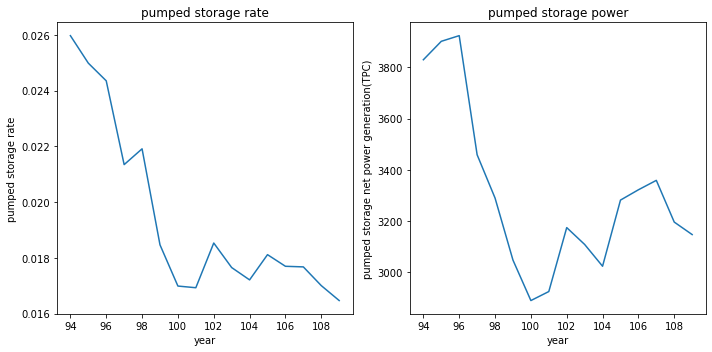

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='pumped storage rate', data=tpc_df)
ax0.set_title('pumped storage rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='pumped storage net power generation(TPC)', data=tpc_df)
ax1.set_title('pumped storage power')

fig.tight_layout()

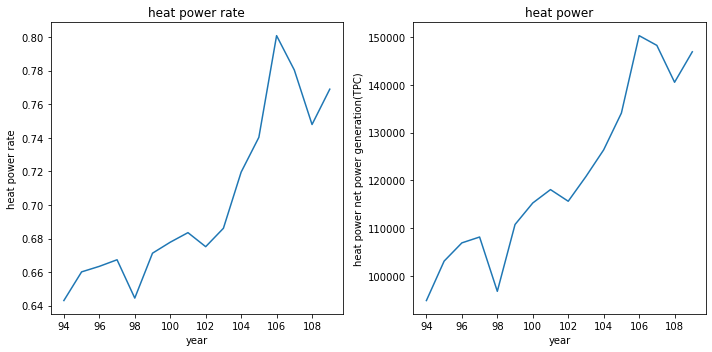

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='heat power rate', data=tpc_df)
ax0.set_title('heat power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='heat power net power generation(TPC)', data=tpc_df)
ax1.set_title('heat power')

fig.tight_layout()

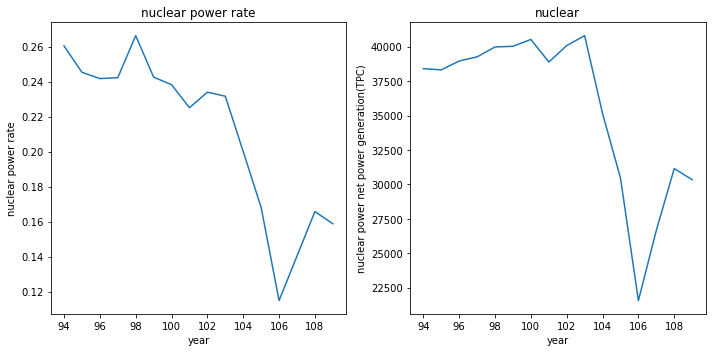

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='nuclear power rate', data=tpc_df)
ax0.set_title('nuclear power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='nuclear power net power generation(TPC)', data=tpc_df)
ax1.set_title('nuclear')

fig.tight_layout()

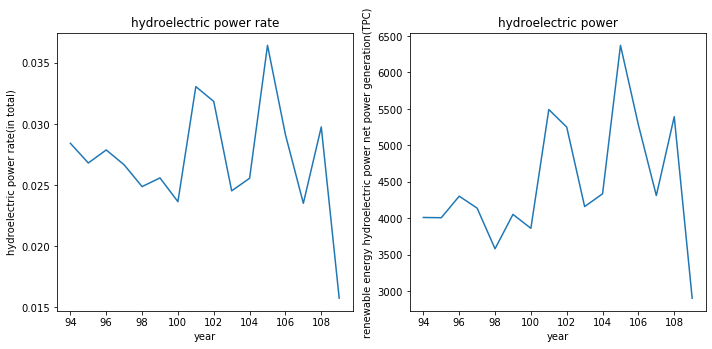

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='hydroelectric power rate(in total)', data=tpc_df)
ax0.set_title('hydroelectric power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='renewable energy hydroelectric power net power generation(TPC)', data=tpc_df)
ax1.set_title('hydroelectric power')

fig.tight_layout()

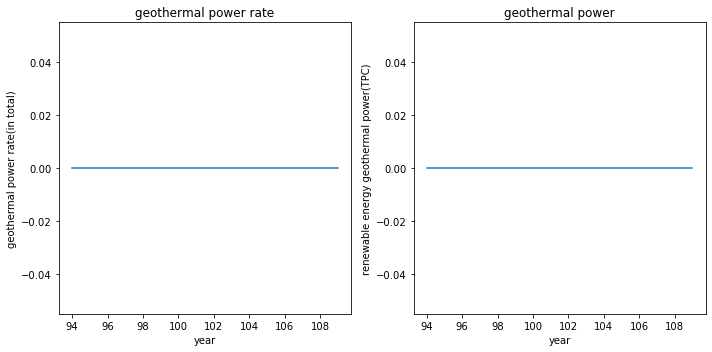

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='geothermal power rate(in total)', data=tpc_df)
ax0.set_title('geothermal power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='renewable energy geothermal power(TPC)', data=tpc_df)
ax1.set_title('geothermal power')

fig.tight_layout()

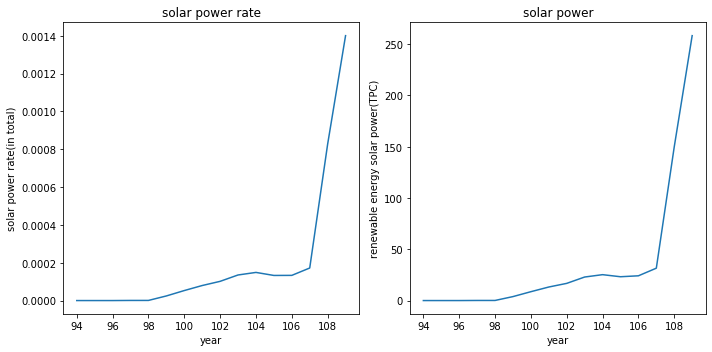

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='solar power rate(in total)', data=tpc_df)
ax0.set_title('solar power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='renewable energy solar power(TPC)', data=tpc_df)
ax1.set_title('solar power')

fig.tight_layout()

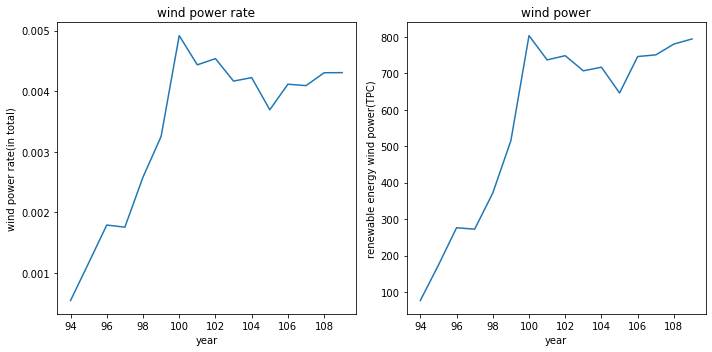

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

ax0 = sns.lineplot(ax=axes[0], x='year', y='wind power rate(in total)', data=tpc_df)
ax0.set_title('wind power rate')

ax1 = sns.lineplot(ax=axes[1], x='year', y='renewable energy wind power(TPC)', data=tpc_df)
ax1.set_title('wind power')

fig.tight_layout()

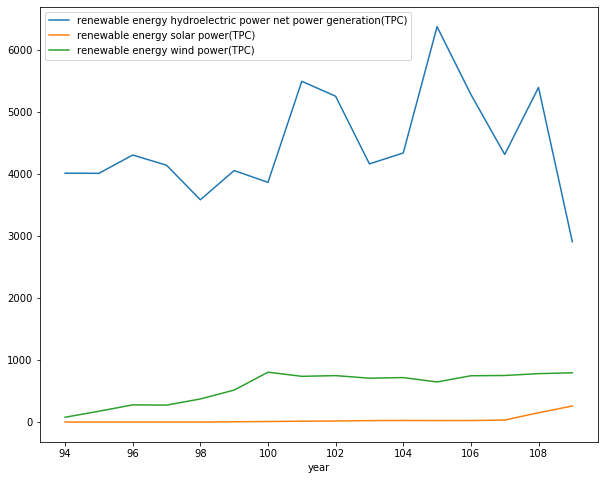

In [12]:
tpc_renewable_df = tpc_df[['year', 'renewable energy hydroelectric power net power generation(TPC)', 'renewable energy solar power(TPC)', 'renewable energy wind power(TPC)']]

tpc_renewable_df.plot(x='year', figsize=(10,8))

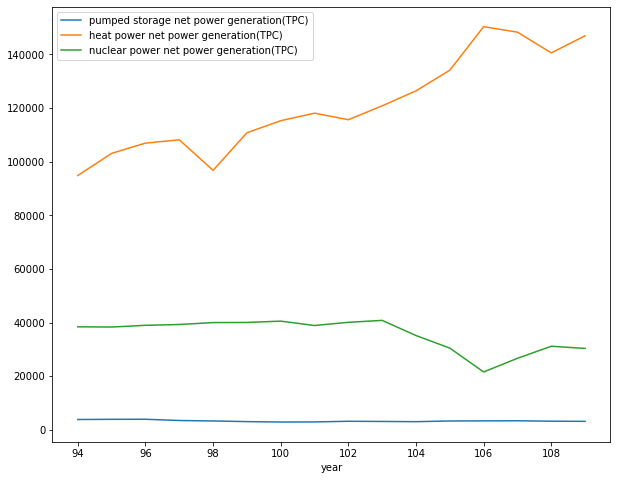

In [13]:
tpc_non_renewable_df = tpc_df[['year', 'pumped storage net power generation(TPC)', 'heat power net power generation(TPC)', 'nuclear power net power generation(TPC)']]

tpc_non_renewable_df.plot(x='year', figsize=(10,8))

,hydroelectric power rate(in renewable),solar power rate(in renewable),wind power rate(in renewable)
count,16.000000,16.000000,16.000000
mean,0.881550,0.007488,0.110963
std,0.059034,0.016446,0.047997
min,0.734076,0.000000,0.018835
25%,0.852398,0.000024,0.084243
50%,0.876359,0.002451,0.120647
75%,0.914018,0.004763,0.141951
max,0.981165,0.065295,0.200630


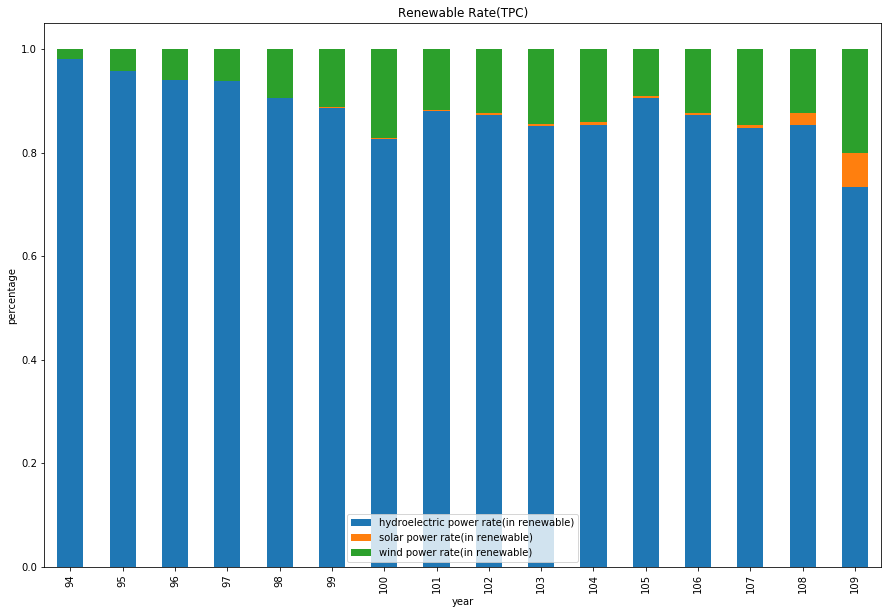

In [14]:
ax = tpc_df[[
    'year', 
    'hydroelectric power rate(in renewable)',
    'solar power rate(in renewable)',
    'wind power rate(in renewable)'
]].plot(x='year', figsize=(15,10), kind='bar', stacked=True, title='Renewable Rate(TPC)')
ax.set_ylabel("percentage")

tpc_df[[
    'hydroelectric power rate(in renewable)',
    'solar power rate(in renewable)',
    'wind power rate(in renewable)'
]].describe()

Text(0, 0.5, 'GWh 百萬度')

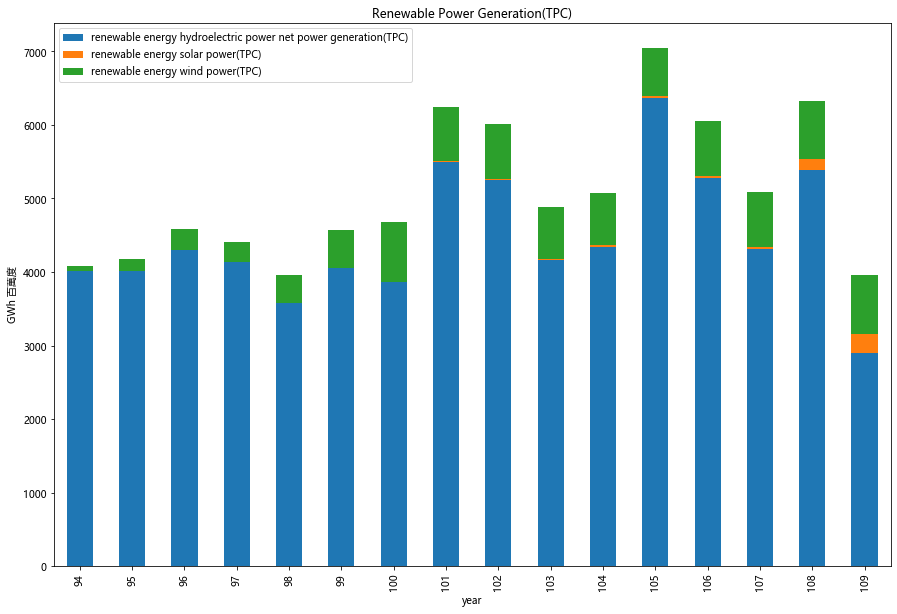

In [15]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
ax = tpc_df[[
    'year', 
    'renewable energy hydroelectric power net power generation(TPC)',
    'renewable energy solar power(TPC)', 
    'renewable energy wind power(TPC)',
]].plot(x='year', figsize=(15,10), kind='bar', stacked=True, title='Renewable Power Generation(TPC)')
ax.set_ylabel(u"GWh 百萬度")

In [16]:
# tpc_df['renewable energy power generation(TPC)'] = tpc_df.apply(get_renewable_energy_sum, axis = 1)
# tpc_df['non-renewable energy power generation(TPC)'] = tpc_df.apply(get_non_renewable_energy_sum, axis = 1)
# tpc_df['renewable energy rate'] = tpc_df.apply(lambda row: row['renewable energy power generation(TPC)'] / row['total power generation(TPC)'], axis = 1)
# tpc_df['non-renewable energy rate'] = tpc_df.apply(lambda row: row['non-renewable energy power generation(TPC)'] / row['total power generation(TPC)'], axis = 1)

# tpc_df['hydroelectric power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy hydroelectric power net power generation(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)
# tpc_df['geothermal power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy geothermal power(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)
# tpc_df['solar power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy solar power(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)
# tpc_df['wind power rate(in renewable)'] = tpc_df.apply(lambda row: row['renewable energy wind power(TPC)'] / row['renewable energy power generation(TPC)'], axis=1)

# tpc_df['hydroelectric power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy hydroelectric power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
# tpc_df['geothermal power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy geothermal power(TPC)'] / row['total power generation(TPC)'], axis=1)
# tpc_df['solar power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy solar power(TPC)'] / row['total power generation(TPC)'], axis=1)
# tpc_df['wind power rate(in total)'] = tpc_df.apply(lambda row: row['renewable energy wind power(TPC)'] / row['total power generation(TPC)'], axis=1)
# tpc_df['pumped storage rate(in total)'] = tpc_df.apply(lambda row: row['pumped storage net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
# tpc_df['heat power rate(in total)'] = tpc_df.apply(lambda row: row['heat power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)
# tpc_df['nuclear power rate(in total)'] = tpc_df.apply(lambda row: row['nuclear power net power generation(TPC)'] / row['total power generation(TPC)'], axis=1)


,hydroelectric power rate(in total),solar power rate(in total),wind power rate(in total),pumped storage rate(in total),heat power rate(in total),nuclear power rate(in total)
count,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000
mean,0.027088,2.006419e-04,0.003367,0.020238,0.729624,0.219482
std,0.004680,3.767219e-04,0.001360,0.003378,0.050427,0.048942
min,0.015753,0.000000e+00,0.000545,0.017066,0.671826,0.118944
25%,0.024789,6.661603e-07,0.002384,0.017786,0.695480,0.173591
50%,0.026732,9.056334e-05,0.004103,0.018545,0.708197,0.241794
75%,0.029285,1.386715e-04,0.004304,0.022419,0.769016,0.252726
max,0.036429,1.401158e-03,0.004915,0.027136,0.829354,0.277673


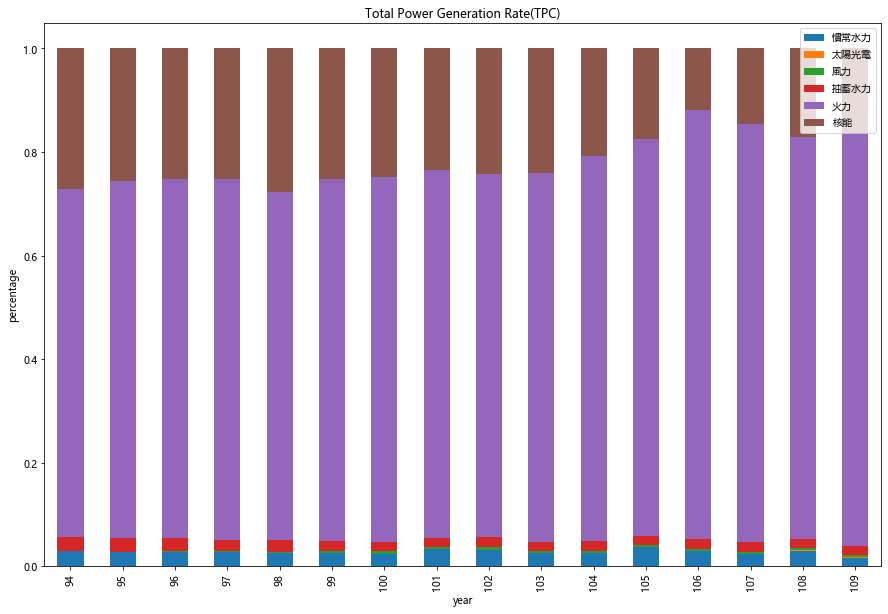

In [17]:
n_tpc_df= tpc_df[[
    'year', 
    'hydroelectric power rate(in total)',
    'solar power rate(in total)',
    'wind power rate(in total)',
    'pumped storage rate(in total)',
    'heat power rate(in total)',
    'nuclear power rate(in total)'
]].copy()

n_tpc_df.rename(columns = { 
    'hydroelectric power rate(in total)': '慣常水力',
    'solar power rate(in total)': '太陽光電',
    'wind power rate(in total)': '風力',
    'pumped storage rate(in total)': '抽蓄水力',
    'heat power rate(in total)': '火力',
    'nuclear power rate(in total)': '核能'
}, inplace = True)

ax = n_tpc_df.plot(x='year', figsize=(15,10), kind='bar', stacked=True, title='Total Power Generation Rate(TPC)')


ax.set_ylabel("percentage")

tpc_df[[
    'hydroelectric power rate(in total)',
    'solar power rate(in total)',
    'wind power rate(in total)',
    'pumped storage rate(in total)',
    'heat power rate(in total)',
    'nuclear power rate(in total)'
]].describe()

Text(0, 0.5, 'GWh 百萬度')

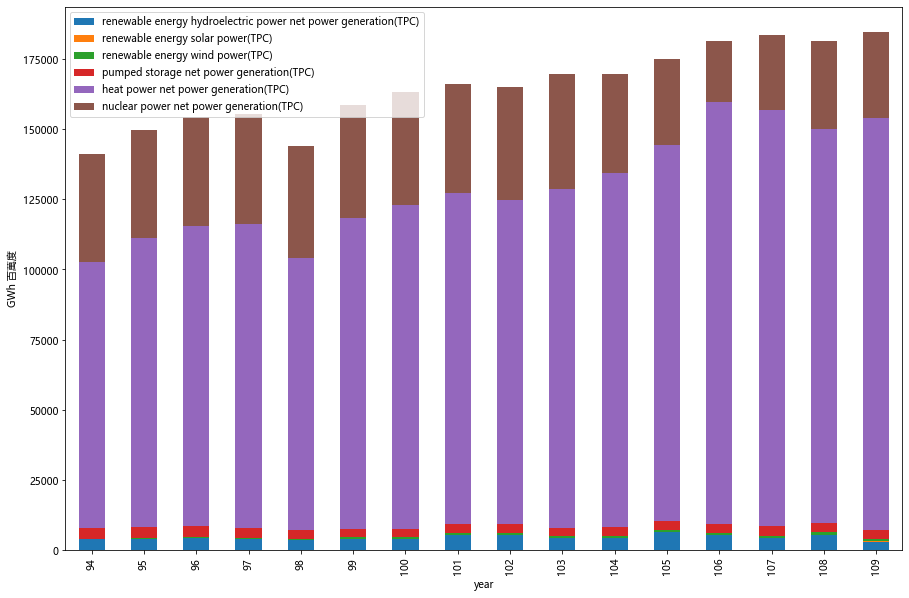

In [18]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
ax = tpc_df[[
     'year', 
     'renewable energy hydroelectric power net power generation(TPC)', 'renewable energy solar power(TPC)', 'renewable energy wind power(TPC)',
     'pumped storage net power generation(TPC)', 'heat power net power generation(TPC)', 'nuclear power net power generation(TPC)'
]].plot(x='year', figsize=(15,10), kind='bar',stacked=True)
ax.set_ylabel(u"GWh 百萬度")

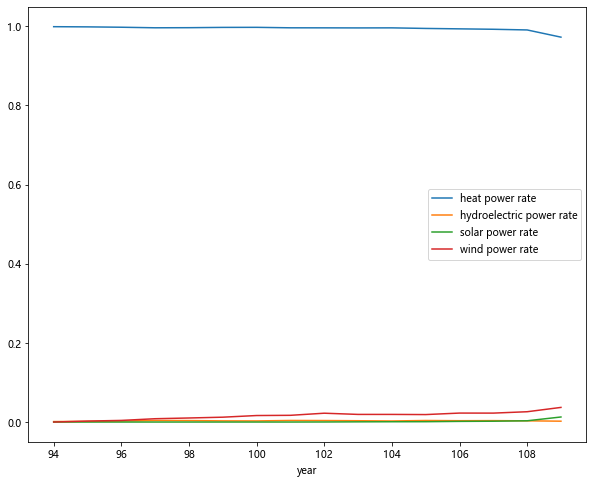

In [19]:
ipp_df = new_df[[
    'year',
    'heat power net power generation(IPP)',
    'renewable energy hydroelectric power(IPP)',
    'renewable energy solar power(IPP)', 
    'renewable energy wind power(IPP)'
]].copy()

def ipp_sum(row):
    sum = 0
    sum += row['heat power net power generation(IPP)']
    sum += row['renewable energy hydroelectric power(IPP)']
    sum += row['renewable energy solar power(IPP)']
    sum += row['renewable energy solar power(IPP)']
    return sum

ipp_df['total power generation(IPP)'] = ipp_df.apply(ipp_sum, axis = 1)
ipp_df['heat power rate'] = ipp_df.apply(lambda row: row['heat power net power generation(IPP)'] / row['total power generation(IPP)'], axis=1)
ipp_df['hydroelectric power rate'] = ipp_df.apply(lambda row: row['renewable energy hydroelectric power(IPP)'] / row['total power generation(IPP)'], axis=1)
ipp_df['solar power rate'] = ipp_df.apply(lambda row: row['renewable energy solar power(IPP)'] / row['total power generation(IPP)'], axis=1)
ipp_df['wind power rate'] = ipp_df.apply(lambda row: row['renewable energy wind power(IPP)'] / row['total power generation(IPP)'], axis=1)

ipp_df[[
   'year', 'heat power rate', 'hydroelectric power rate', 'solar power rate', 'wind power rate'
]].plot(x='year', figsize=(10,8))

,heat power rate,hydroelectric power rate,solar power rate,wind power rate
count,16.000000,16.000000,16.000000,16.000000
mean,0.994243,0.003035,0.001361,0.016157
std,0.006211,0.000843,0.003173,0.009602
min,0.972390,0.001167,0.000000,0.000000
25%,0.994153,0.002651,0.000000,0.009762
50%,0.995965,0.003187,0.000073,0.017909
75%,0.997087,0.003715,0.001040,0.022353
max,0.998833,0.003992,0.012741,0.036945


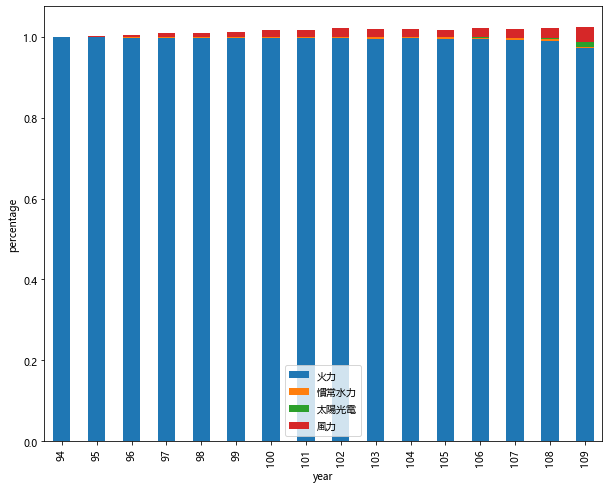

In [20]:
n_ipp_df = ipp_df[[
   'year', 'heat power rate', 'hydroelectric power rate', 'solar power rate', 'wind power rate'
]].copy()

n_ipp_df.rename(columns ={ 
    'heat power rate': '火力',
    'hydroelectric power rate': '慣常水力', 
    'solar power rate': '太陽光電', 
    'wind power rate': '風力'
}, inplace = True)


ax =n_ipp_df.plot(x='year', figsize=(10,8),kind='bar', stacked=True)
ax.set_ylabel("percentage")

ipp_df[[ 
    'heat power rate', 'hydroelectric power rate', 'solar power rate', 'wind power rate'
]].describe()

,heat power net power generation(IPP),renewable energy hydroelectric power(IPP),renewable energy solar power(IPP),renewable energy wind power(IPP),total power generation(IPP)
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,40029.365566,122.555883,58.430555,667.362755,40268.782561
std,2034.518196,34.680708,138.650287,416.304693,2188.773761
min,36480.256780,43.830523,0.000000,0.000000,36624.591590
25%,38805.636100,107.587916,0.000000,381.608153,38934.517693
50%,40738.385710,131.411337,2.907906,735.089822,40890.579143
75%,41406.548155,146.971085,44.419479,894.585779,41603.540077
max,42567.212010,166.172400,557.750862,1617.292927,43775.867134


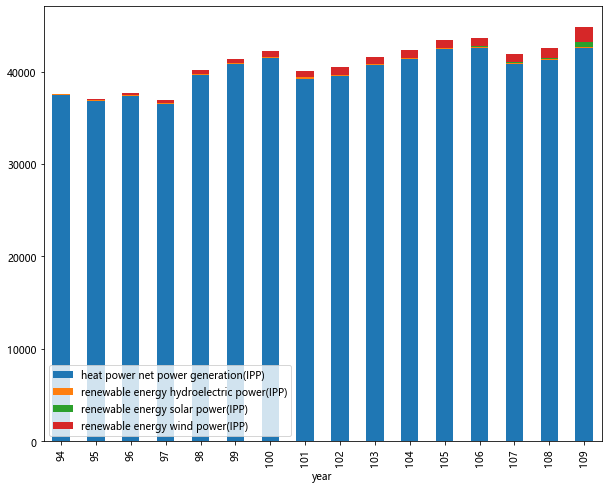

In [21]:
ipp_df[[
    'year', 
    'heat power net power generation(IPP)', 
    'renewable energy hydroelectric power(IPP)', 
    'renewable energy solar power(IPP)', 
    'renewable energy wind power(IPP)'
]].plot(x='year', figsize=(10,8),kind='bar', stacked=True)

ipp_df[[
   'heat power net power generation(IPP)', 'renewable energy hydroelectric power(IPP)', 'renewable energy solar power(IPP)', 'renewable energy wind power(IPP)', 'total power generation(IPP)'
]].describe()

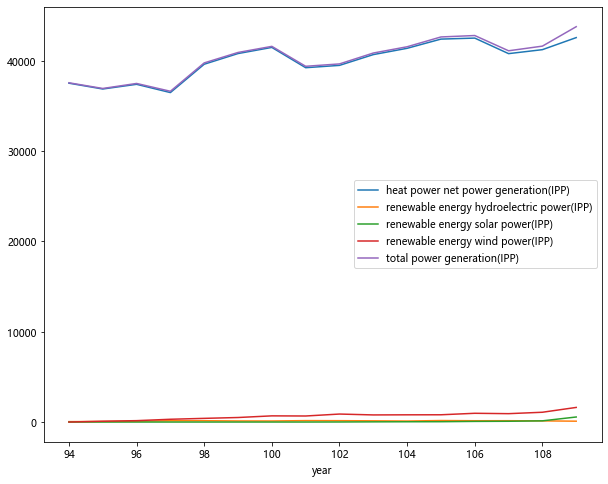

In [22]:
ipp_df[[
   'year', 'heat power net power generation(IPP)', 'renewable energy hydroelectric power(IPP)', 'renewable energy solar power(IPP)', 'renewable energy wind power(IPP)', 'total power generation(IPP)'
]].plot(x='year', figsize=(10,8))

,heat power rate,hydroelectric power rate,geothermal power rate,solar power rate,wind power rate,biomass rate,Waste-to-energy rate
count,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.890742,4.404087e-07,0.000004,0.023522,0.000300,0.005881,0.079552
std,0.037288,1.761635e-06,0.000011,0.035786,0.000168,0.001121,0.004815
min,0.794895,0.000000e+00,0.000000,0.000023,0.000162,0.003888,0.071373
25%,0.878721,0.000000e+00,0.000000,0.000198,0.000206,0.005105,0.076838
50%,0.905817,0.000000e+00,0.000000,0.005635,0.000231,0.005921,0.080182
75%,0.916105,0.000000e+00,0.000000,0.030042,0.000292,0.006690,0.083422
max,0.921528,7.046540e-06,0.000043,0.119427,0.000688,0.007615,0.086008


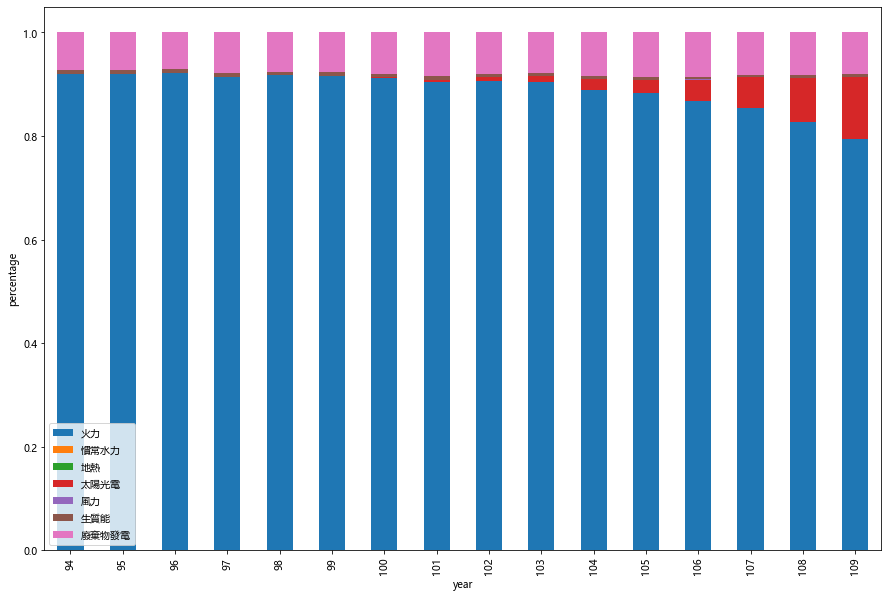

In [30]:
self_df = new_df[[
    'year', 
    'heat power net power generation(self)',
    'renewable energy hydroelectric power(self)',
    'renewable energy geothermal power(self)',
    'renewable energy solar power(self)',
    'renewable energy wind power(self)',
    'renewable energy biomass(self)',
    'renewable energy Waste-to-energy(self)', 
    'total power generation(self)'
]].copy()

def self_total(row):
    sum = 0
    sum += row['heat power net power generation(self)']
    sum += row['renewable energy hydroelectric power(self)']
    sum += row['renewable energy geothermal power(self)']
    sum += row['renewable energy solar power(self)']
    sum += row['renewable energy wind power(self)']
    sum += row['renewable energy biomass(self)']
    sum += row['renewable energy Waste-to-energy(self)']
    return sum

self_df['total power generation(self)'] = self_df.apply(self_total, axis=1)
self_df['heat power rate'] = self_df.apply(lambda row: row['heat power net power generation(self)'] / row['total power generation(self)'], axis=1)
self_df['hydroelectric power rate'] = self_df.apply(lambda row: row['renewable energy hydroelectric power(self)'] / row['total power generation(self)'], axis=1)
self_df['geothermal power rate'] = self_df.apply(lambda row: row['renewable energy geothermal power(self)'] / row['total power generation(self)'], axis=1)
self_df['solar power rate'] = self_df.apply(lambda row: row['renewable energy solar power(self)'] / row['total power generation(self)'], axis=1)
self_df['wind power rate'] = self_df.apply(lambda row: row['renewable energy wind power(self)'] / row['total power generation(self)'], axis=1)
self_df['biomass rate'] = self_df.apply(lambda row: row['renewable energy biomass(self)'] / row['total power generation(self)'], axis=1)
self_df['Waste-to-energy rate'] = self_df.apply(lambda row: row['renewable energy Waste-to-energy(self)'] / row['total power generation(self)'], axis=1)

n_self_df = self_df[[
    'year', 'heat power rate', 'hydroelectric power rate', 'geothermal power rate', 'solar power rate', 'wind power rate', 'biomass rate', 'Waste-to-energy rate'
]].copy()


n_self_df.rename(columns = { 
    'heat power rate': '火力',
    'hydroelectric power rate': '慣常水力',
    'geothermal power rate': '地熱',
    'solar power rate': '太陽光電',
    'wind power rate': '風力',
    'biomass rate': '生質能',
    'Waste-to-energy rate': '廢棄物發電'
}, inplace = True)

ax = n_self_df.plot(x='year', figsize=(15,10), kind='bar', stacked=True)
ax.set_ylabel("percentage")

self_df[[
    'heat power rate', 'hydroelectric power rate', 'geothermal power rate', 'solar power rate', 'wind power rate', 'biomass rate', 'Waste-to-energy rate'
]].describe()


,heat power net power generation(self),renewable energy hydroelectric power(self),renewable energy geothermal power(self),renewable energy solar power(self),renewable energy wind power(self),renewable energy biomass(self),renewable energy Waste-to-energy(self),total power generation(self)
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,36655.311556,0.019468,0.166869,1002.920497,12.557447,241.796510,3271.966350,41184.738697
std,1906.344582,0.077872,0.502115,1570.800323,7.612348,46.971049,194.134721,2089.066178
min,33734.752180,0.000000,0.000000,0.960000,6.455651,169.779996,3036.144627,37564.302140
25%,35566.819518,0.000000,0.000000,7.855020,8.242341,204.698873,3117.849358,39685.385733
50%,36389.843745,0.000000,0.000000,222.592172,9.361393,238.775536,3221.311763,40579.269918
75%,37444.894432,0.000000,0.000000,1180.742299,12.375143,270.652258,3387.286008,42753.375411
max,40842.610700,0.311488,1.911729,5279.211029,29.954504,323.479207,3630.396197,44320.516544


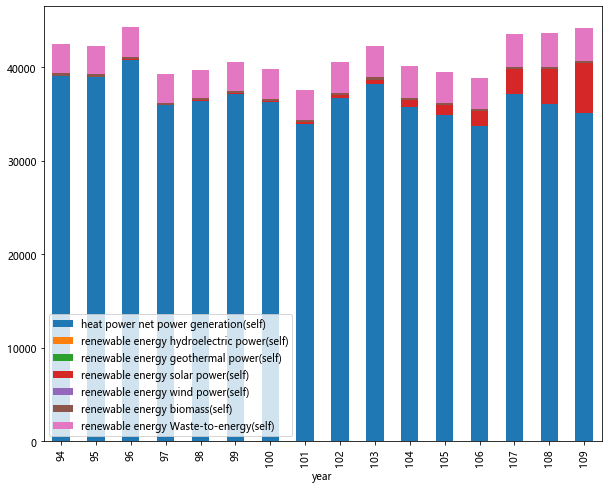

In [24]:
self_df[[
    'year', 
    'heat power net power generation(self)',
    'renewable energy hydroelectric power(self)',
    'renewable energy geothermal power(self)',
    'renewable energy solar power(self)',
    'renewable energy wind power(self)',
    'renewable energy biomass(self)',
    'renewable energy Waste-to-energy(self)', 
]].plot(x='year', figsize=(10,8), kind='bar', stacked=True)

self_df[[
    'heat power net power generation(self)',
    'renewable energy hydroelectric power(self)',
    'renewable energy geothermal power(self)',
    'renewable energy solar power(self)',
    'renewable energy wind power(self)',
    'renewable energy biomass(self)',
    'renewable energy Waste-to-energy(self)',
    'total power generation(self)'
]].describe()

,total power generation,total power generation(TPC),total power generation(IPP),total power generation(self)
count,16.000000,16.000000,16.000000,16.000000
mean,253674.481269,171612.027813,40877.714760,41184.738695
std,16374.709902,13914.241420,2477.648654,2089.066179
min,227512.267100,147466.595000,36930.987500,37564.302140
25%,241913.803250,161821.690600,39455.521610,39685.385730
50%,252253.925500,172013.898800,41524.534535,40579.269915
75%,265644.856775,182802.106625,42385.475612,42753.375405
max,280139.911400,191100.110100,44835.409200,44320.516550


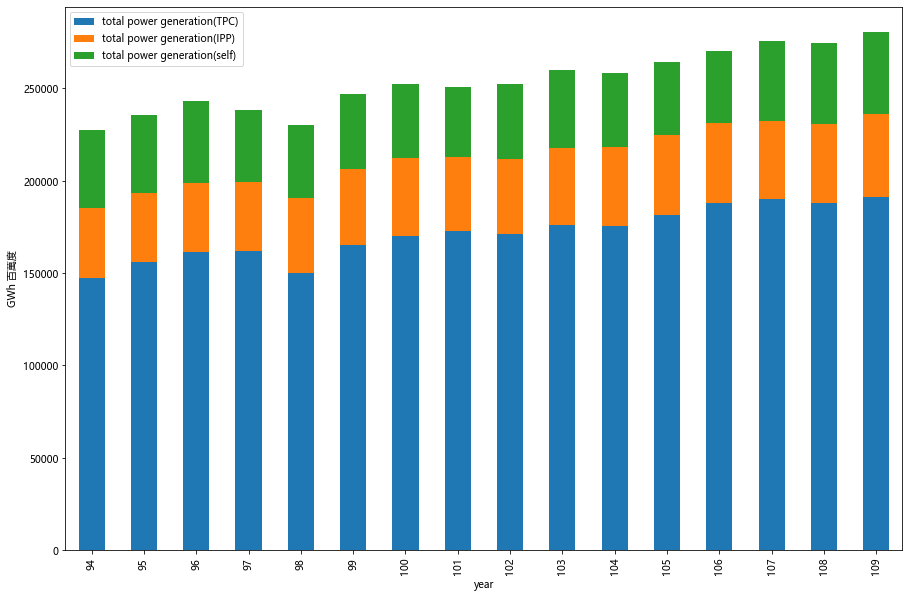

In [25]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
compare_df = new_df[[
    'year', 
    'renewable energy',
    'total power generation',
    'total power generation(TPC)',
    'total power generation(IPP)',
    'total power generation(self)'
]].copy()


ax = compare_df[['year','total power generation(TPC)', 'total power generation(IPP)', 'total power generation(self)']].plot(x='year', figsize=(15, 10),  kind='bar', stacked=True)
ax.set_ylabel(u"GWh 百萬度")
compare_df[['total power generation','total power generation(TPC)', 'total power generation(IPP)', 'total power generation(self)']].describe()

,total power generation rate(TPC),total power generation rate(IPP),total power generation rate(self)
count,16.000000,16.000000,16.000000
mean,0.675841,0.161274,0.162885
std,0.013483,0.005842,0.012068
min,0.648170,0.152244,0.143736
25%,0.666686,0.156720,0.157224
50%,0.679373,0.160373,0.159948
75%,0.685576,0.164543,0.166963
max,0.694583,0.174635,0.186721


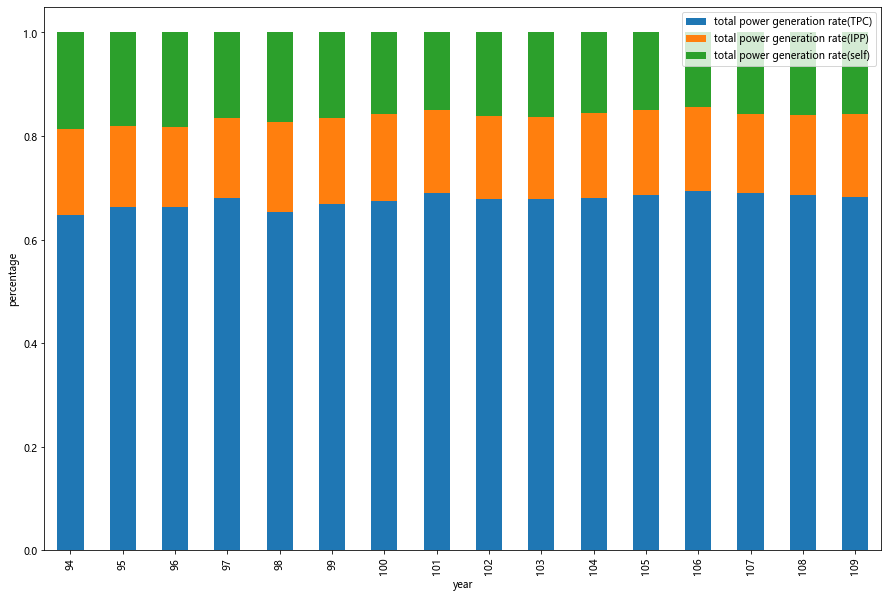

In [26]:
compare_df['total power generation rate(TPC)'] = compare_df.apply(lambda row: row['total power generation(TPC)'] / row['total power generation'], axis=1)
compare_df['total power generation rate(IPP)'] = compare_df.apply(lambda row: row['total power generation(IPP)'] / row['total power generation'], axis=1)
compare_df['total power generation rate(self)'] = compare_df.apply(lambda row: row['total power generation(self)'] / row['total power generation'], axis=1)

ax = compare_df[[
    'year',
    'total power generation rate(TPC)', 'total power generation rate(IPP)', 'total power generation rate(self)'
]].plot(x='year', figsize=(15,10),  kind='bar', stacked=True)
ax.set_ylabel("percentage")

compare_df[['total power generation rate(TPC)', 'total power generation rate(IPP)', 'total power generation rate(self)']].describe()


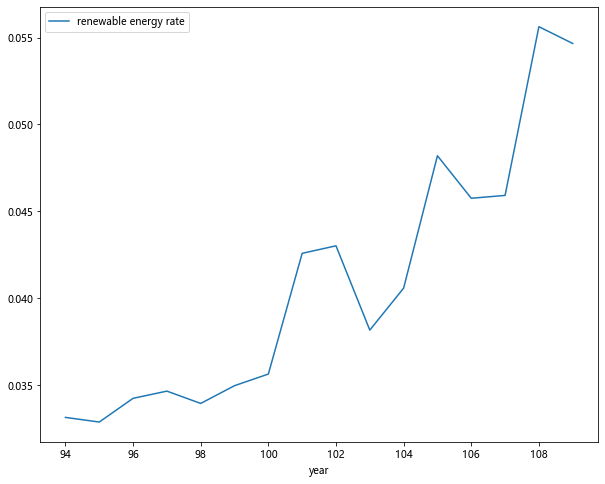

In [27]:
compare_df['renewable energy rate'] = compare_df.apply(lambda row: row['renewable energy'] / row['total power generation'], axis=1)

compare_df[[ 'year', 'renewable energy rate']].plot(x='year', figsize=(10,8))